In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2023)

###데이터 로드(아이리스)

In [ ]:
#data load
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [ ]:
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#train / test set
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.7, random_state=2023)

In [ ]:
print(len(train_df))
print(len(test_df))

105
45


In [ ]:
train_target = train_df['target']
test_target = test_df['target']
train_data = train_df.drop('target', axis=1)
test_data = test_df.drop('target', axis=1)

###기본 KNN

In [ ]:
#knn 시작
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

In [ ]:
#그리드서치를 위한 파라미터 설정
params_1 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['uniform']
}

In [ ]:
params_1

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'p': [1, 2],
 'weights': ['uniform']}

In [ ]:
grid_cv = GridSearchCV(knn, param_grid = params_1, cv = 3)

In [ ]:
grid_cv.fit(train_data, train_target)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform']})

In [ ]:
grid_cv.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 7, p = 1, weights = 'uniform')
knn_1.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=7, p=1)

In [ ]:
#예측 진행
test_pred = knn_1.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("test_data accuracy : ", accuracy_score(test_target, test_pred))
print("* confusion matrix *")

cm = confusion_matrix(test_target, test_pred)
cm_ = pd.DataFrame(cm).rename(index={0:'target(0)', 1:'target(1)', 2:'target(2)'}, columns={0:'pred(0)', 1:'pred(1)', 2:'pred(2)'})
print(cm_)

test_data accuracy :  0.9777777777777777
* confusion matrix *
           pred(0)  pred(1)  pred(2)
target(0)       17        0        0
target(1)        0       17        0
target(2)        0        1       10


###weighted KNN

In [ ]:
#가중치를 부여하는 경우 파라미터 조정 (그리드서치)
params_2 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['distance']
}

In [ ]:
grid_cv = GridSearchCV(knn, param_grid = params_2, cv = 3)

In [ ]:
grid_cv.fit(train_data, train_target)
grid_cv.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors = 7, p = 2, weights = 'distance')
knn_2.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
#예측 진행
test_pred = knn_2.predict(test_data)

In [ ]:
print("test_data accuracy : ", accuracy_score(test_target, test_pred))
print("* confusion matrix *")

cm = confusion_matrix(test_target, test_pred)
cm_ = pd.DataFrame(cm).rename(index={0:'target(0)', 1:'target(1)', 2:'target(2)'}, columns={0:'pred(0)', 1:'pred(1)', 2:'pred(2)'})
print(cm_)

test_data accuracy :  1.0
* confusion matrix *
           pred(0)  pred(1)  pred(2)
target(0)       17        0        0
target(1)        0       17        0
target(2)        0        0       11


###Scaling

In [ ]:
#변수 스케일링을 사용하는 경우
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#train과 test 모두 스케일링 진행
scaler.fit(train_data)

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
params_3 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['uniform','distance']
}

In [ ]:
params_3

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [ ]:
grid_cv = GridSearchCV(knn, param_grid = params_3, cv = 3)
grid_cv.fit(scaled_train_data, train_target)
grid_cv.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors = 5, p = 2, weights = 'distance')
knn_3.fit(scaled_train_data, train_target)

KNeighborsClassifier(weights='distance')

In [ ]:
#예측 진행
test_pred = knn_3.predict(scaled_test_data)

In [ ]:
print("test_data accuracy : ", accuracy_score(test_target, test_pred))
print("* confusion matrix *")

cm = confusion_matrix(test_target, test_pred)
cm_ = pd.DataFrame(cm).rename(index={0:'target(0)', 1:'target(1)', 2:'target(2)'}, columns={0:'pred(0)', 1:'pred(1)', 2:'pred(2)'})
print(cm_)

test_data accuracy :  0.9777777777777777
* confusion matrix *
           pred(0)  pred(1)  pred(2)
target(0)       17        0        0
target(1)        0       17        0
target(2)        0        1       10


###시각화 (2개 변수만 이용)
* https://lovelydiary.tistory.com/372 참고

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np
 
# K-최근접이웃 분류의 시각화를 좌표평면에 하기 위해서는 예측변수를 2개까지만 사용할 수 있음
# sepal length (cm)와 sepal width (cm)의 값만 뽑아 2차 배열로 변환
predictors = iris['feature_names']
train_2 = np.array(train_data[predictors[0:2]])
test_2 = np.array(test_data[predictors[0:2]])

# 파라미터 설정
params_4 = {
    "n_neighbors": [i for i in range(1, 20, 2)],
    "p": [1, 2], #1은 맨하탄, 2는 유클리드
    "weights": ['uniform','distance']
}

grid_cv = GridSearchCV(knn, param_grid = params_4, cv = 3)
grid_cv.fit(train_2, train_target)
grid_cv.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

test_data accuracy :  0.8444444444444444


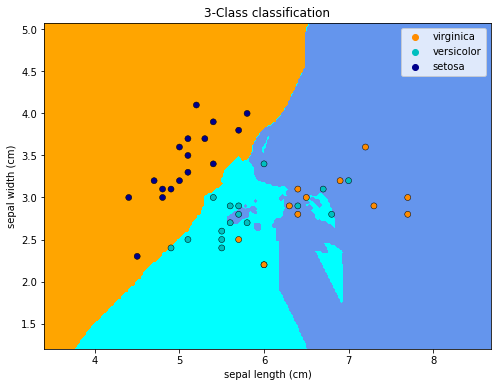

In [ ]:
# color map 설정
cmap_light = ListedColormap(['orange', 'cyan','cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
 
# 예측
knn_4 = KNeighborsClassifier(n_neighbors = 7, p = 2, weights = 'uniform')
knn_4.fit(train_2, train_target)

test_pred = knn_4.predict(test_2)
print("test_data accuracy : ", accuracy_score(test_target, test_pred))
 
# 분류 경계를 색으로 구분하기 위한 작업
h = .02  # step size in the mesh
x_min, x_max = test_2[:, 0].min() - 1, test_2[:, 0].max() + 1
y_min, y_max = test_2[:, 1].min() - 1, test_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# 그래프 사이즈 설정
plt.figure(figsize=(8, 6))
 
# 분류 경계 별 색칠하기
plt.contourf(xx, yy, Z, cmap=cmap_light)
 
# 각 훈련값의 좌표들을 그린 산점도
y = test_target
sns.scatterplot(x=test_2[:, 0], y=test_2[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
 
plt.title("3-Class classification")
plt.xlabel(predictors[0])
plt.ylabel(predictors[1])
 
plt.show()

test_data accuracy :  0.7111111111111111


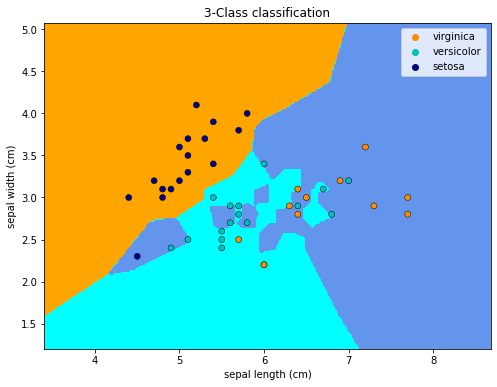

In [ ]:
#k의 개수 변화시키기기
# 예측
knn_4 = KNeighborsClassifier(n_neighbors = 1, p = 2, weights = 'uniform')
knn_4.fit(train_2, train_target)

test_pred = knn_4.predict(test_2)
print("test_data accuracy : ", accuracy_score(test_target, test_pred))
 
# 분류 경계를 색으로 구분하기 위한 작업
h = .02  # step size in the mesh
x_min, x_max = test_2[:, 0].min() - 1, test_2[:, 0].max() + 1
y_min, y_max = test_2[:, 1].min() - 1, test_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# 그래프 사이즈 설정
plt.figure(figsize=(8, 6))
 
# 분류 경계 별 색칠하기
plt.contourf(xx, yy, Z, cmap=cmap_light)
 
# 각 훈련값의 좌표들을 그린 산점도
y = test_target
sns.scatterplot(x=test_2[:, 0], y=test_2[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
 
plt.title("3-Class classification")
plt.xlabel(predictors[0])
plt.ylabel(predictors[1])
 
plt.show()

test_data accuracy :  0.8222222222222222


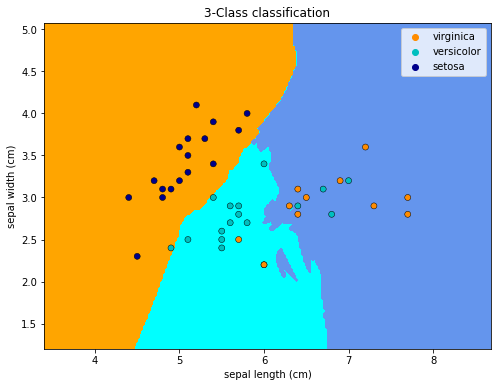

In [ ]:
#k의 값 변화시키기
# 예측
knn_4 = KNeighborsClassifier(n_neighbors = 19, p = 2, weights = 'uniform')
knn_4.fit(train_2, train_target)

test_pred = knn_4.predict(test_2)
print("test_data accuracy : ", accuracy_score(test_target, test_pred))
 
# 분류 경계를 색으로 구분하기 위한 작업
h = .02  # step size in the mesh
x_min, x_max = test_2[:, 0].min() - 1, test_2[:, 0].max() + 1
y_min, y_max = test_2[:, 1].min() - 1, test_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# 그래프 사이즈 설정
plt.figure(figsize=(8, 6))
 
# 분류 경계 별 색칠하기
plt.contourf(xx, yy, Z, cmap=cmap_light)
 
# 각 훈련값의 좌표들을 그린 산점도
y = test_target
sns.scatterplot(x=test_2[:, 0], y=test_2[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
 
plt.title("3-Class classification")
plt.xlabel(predictors[0])
plt.ylabel(predictors[1])
 
plt.show()